# Laboratorio 2 Inteligencia de negocios - Agrupación #

Grupo 17 - Miembros:


*   Juan Esteban Diaz Castro - 202121646 - Estudiante 1 - Kmeans
*   Jose Botello - 202022580
*   Samuel Ramirez - 202123423

In [4]:
%pip install numpy
%pip install pandas
%pip install joblib
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install scipy
%pip install jupyter

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin

import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler

# 1. Carga de Datos

In [6]:
data = "./data/202510_Laboratorio 2 - Agrupación_Customer_Data.csv"

customers = pd.read_csv(data, sep=";", encoding="ISO-8859-1")

customer_df = customers.copy()

customer_df.shape

(8950, 18)

In [7]:
customer_df.sample(5)

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
1713,C11714,14024.51066,0.759296,41144.04683,6272.284925,19210.45482,29321.09592,0.657113,0.168136,0.518949,0.911557,84,185,13032.45345,4719.584620,54920.28677,0.375980,10
5217,C15218,14495.88926,0.705732,41664.76760,6754.816549,18475.98374,39919.27391,0.794208,0.289440,0.481858,0.901117,73,206,13659.69219,5145.489212,58755.20489,0.419542,10
7133,C17134,14255.96667,0.746952,41839.66280,7155.767412,18407.54031,41828.21177,0.678579,0.218246,0.528286,1.034202,84,223,14970.33411,9509.568204,62581.10974,0.395540,10
688,C10689,12999.47870,0.733435,44836.06921,8176.060596,20292.99719,32304.92309,0.723912,0.175234,0.505503,0.940543,100,222,13600.90879,6899.394425,50380.26655,0.385592,10
3897,C13898,14775.75178,0.836076,38908.70132,4666.097788,19411.39759,36669.99646,0.884041,0.329006,0.490769,0.892430,79,182,15526.70098,8890.061939,63140.85449,0.381798,9


In [8]:
customer_df.dtypes

ID                      object
SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object

# 2. Entendimiento de los Datos

2.1 Características de los Datos

Para nuestros datos numéricos vamos a utilziar describe para poder entenderlos

In [9]:
customer_df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727310,9329.603116,31572.127680,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545350,21367.621275,48780.271750,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727120,25219.127372,57761.175980,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Ahora utilizaremos value_counts() para poder ver nuestros datos categóricos

In [10]:
customer_df["ID"].value_counts()

ID
C18950    1
C10001    1
C10002    1
C10003    1
C10004    1
         ..
C10026    1
C10027    1
C10028    1
C10029    1
C10030    1
Name: count, Length: 8950, dtype: int64

2.2 Perfilamiento de los Datos

2.3 Análisis de Calidad de los Datos

2.3.1 Completitud

Revisaremos el porcentaje de celdas vacias para cada una de las columnas

In [11]:
df_porcentajes = (100*customer_df.isna().sum()/len(customer_df)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
PAGOS_MINIMOS,3.497207
LÍMITE_CREDITO,0.011173
SALDO,0.000000
ID,0.000000
F_SALDO,0.000000
COMPRAS,0.000000
AVANCE_EFECTIVO,0.000000
F_COMPRAS,0.000000
COMPRAS_PUNTUALES,0.000000
COMPRAS_PLAZOS,0.000000


In [12]:
filas_incompletas = customer_df[customer_df.isna().any(axis=1)]
filas_incompletas

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
2,C10003,4305.572068,0.176531,28392.953340,36009.470090,2873.383232,14294.18503,0.419764,0.523662,0.899912,0.207049,72,81,15515.586210,27111.360490,NaN,0.829074,6
31,C10032,3310.590886,0.599920,31427.680340,29692.273750,9395.804625,12119.27183,0.241004,0.759244,0.192674,1.353220,28,307,27471.470630,42788.566250,NaN,0.748458,11
45,C10046,14893.094970,0.754369,43348.871500,7196.968679,20440.098640,36786.55161,0.758416,0.211381,0.501564,0.828791,89,183,16223.672510,8064.315833,NaN,0.377104,10
53,C10054,13030.318170,0.767215,41541.292300,4084.981848,19163.859250,37746.28868,0.854852,0.244613,0.493249,1.065783,97,244,11722.581050,12306.438970,NaN,0.433215,10
78,C10079,3514.910807,0.181879,28067.685300,35318.373000,2660.913729,12034.56947,0.451773,0.494646,0.791138,0.143462,80,65,17314.285730,28487.355700,NaN,0.866448,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,C18923,2712.167972,0.282046,28536.331890,35580.354640,4425.331588,18613.02233,0.359371,0.575407,0.860808,0.408806,82,72,14918.052730,21416.015690,NaN,0.920035,6
8929,C18930,6039.746284,0.223305,32230.694630,34187.764740,3450.289051,10161.10731,0.467539,0.569357,0.810294,0.124760,80,97,13346.607000,26226.982450,NaN,0.816095,6
8934,C18935,3907.309029,0.229597,30254.878710,31994.886640,3183.752172,12765.06700,0.406941,0.659441,0.844801,0.276053,74,84,16760.975030,24010.894490,NaN,0.858690,6
8938,C18939,16551.038470,0.099458,8163.267932,33988.691350,10175.408990,16704.32565,0.603985,0.656120,0.750198,1.016616,46,146,1852.802394,17727.359190,NaN,0.165054,8


Vemos entonces que en las casillas de pagos mínimos y de límite crédito hay celdas vacias, lo ideal sería entonces eliminar estas celdas incompletas, porque si asignamos el valor promedio en cada una de estas vamos a afectar la agrupación ya que estariamos agrupando con datos predictivos.

In [13]:
def drop_empty(dataframe):

    dataframe.dropna(inplace=True)

    return

drop_empty(customer_df)

customer_df.shape

(8636, 18)

Revisando que se hayan eliminado las filas incompletas:

In [14]:
df_porcentajes = (100*customer_df.isna().sum()/len(customer_df)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
ID,0.0
SALDO,0.0
F_SALDO,0.0
COMPRAS,0.0
COMPRAS_PUNTUALES,0.0
COMPRAS_PLAZOS,0.0
AVANCE_EFECTIVO,0.0
F_COMPRAS,0.0
F_COMPRAS_PUNTUALES,0.0
F_COMPRAS_PLAZOS,0.0


El porcentaje de ausencia es de 0% en todas las filas, por lo que vemos que si se eliminaron las filas incompletas

2.3.2 Duplicidad

Revisaremos a continuación las filas duplicadas para posteriormente eliminarlas

In [15]:
df_duplicated = customer_df.loc[customer_df.duplicated(subset=["ID"], keep=False)].sort_values("ID")
df_duplicated

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE


No existen filas duplicadas, por lo que entonces podemos continuar con la consistencia de los datos

2.3.3 Consistencia

Como no tenemos ningun dato categorico podemos pasar a a la validez de los mismos. Esto dado a que ya eliminamos los datos vacios

2.3.4 Validez

Revisamos que los datos estén acorde a lo reportado en el diccionario de datos. Para estar aplicando el modelo de manera correcta 

In [16]:
customer_df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,9383.315225,0.458869,30506.644432,22919.437163,11402.867473,22572.448971,0.559650,0.478428,0.624101,0.734601,76.166975,164.886174,14690.792408,19819.133774,44224.411642,0.545337,8.369152
std,5120.278788,0.282995,11043.384680,13567.922117,7086.859792,12588.448346,0.213905,0.221663,0.208025,0.422409,22.237366,71.263041,5526.888941,11064.989216,15468.635869,0.267686,1.755631
min,0.000000,0.000000,0.000000,916.121374,0.000000,0.000000,0.000000,0.031308,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4274.662323,0.188398,27104.936342,6700.821865,3737.123061,10953.982467,0.407487,0.251875,0.518437,0.230676,65.000000,97.000000,13485.387555,9321.637941,31571.869243,0.336445,7.000000
50%,12012.129670,0.305396,30920.065455,31014.788550,10826.957970,19471.666280,0.504715,0.533603,0.607608,0.947896,82.000000,176.000000,14945.262580,21364.638450,48786.419665,0.432607,8.000000
75%,13743.718880,0.756067,39808.933265,34490.217572,19131.456735,36151.178305,0.777007,0.648637,0.814979,1.028778,92.000000,216.000000,16263.164765,25212.785518,57761.830637,0.815615,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Observamos que el atributo F_AVANCE_EFECTIVO no está en los rangos reportados en el diccionario de datos. Ya que tiene un valor máximo de 1.5, lo cual está fuera del rango especificado. Para corregirlo escalamos los datos.

In [17]:
scaler = MinMaxScaler()

def escalar_atributo(data,atributos):
    data[atributos] = scaler.fit_transform(data[atributos])
    return

escalar_atributo(customer_df,['F_AVANCE_EFECTIVO'])

customer_df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,9383.315225,0.458869,30506.644432,22919.437163,11402.867473,22572.448971,0.559650,0.478428,0.624101,0.489734,76.166975,164.886174,14690.792408,19819.133774,44224.411642,0.545337,8.369152
std,5120.278788,0.282995,11043.384680,13567.922117,7086.859792,12588.448346,0.213905,0.221663,0.208025,0.281606,22.237366,71.263041,5526.888941,11064.989216,15468.635869,0.267686,1.755631
min,0.000000,0.000000,0.000000,916.121374,0.000000,0.000000,0.000000,0.031308,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4274.662323,0.188398,27104.936342,6700.821865,3737.123061,10953.982467,0.407487,0.251875,0.518437,0.153784,65.000000,97.000000,13485.387555,9321.637941,31571.869243,0.336445,7.000000
50%,12012.129670,0.305396,30920.065455,31014.788550,10826.957970,19471.666280,0.504715,0.533603,0.607608,0.631931,82.000000,176.000000,14945.262580,21364.638450,48786.419665,0.432607,8.000000
75%,13743.718880,0.756067,39808.933265,34490.217572,19131.456735,36151.178305,0.777007,0.648637,0.814979,0.685852,92.000000,216.000000,16263.164765,25212.785518,57761.830637,0.815615,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Observamos como ya todos los valores se encuentran dentro de los rangos requeridos.

# 3 Preparación de los datos

Vamos a observar si todos los atributos son necesarios para nuestro algoritmo de agrupación. Para ello determinaremos la correlación que existe entre cada uno de ellos.

<Axes: >

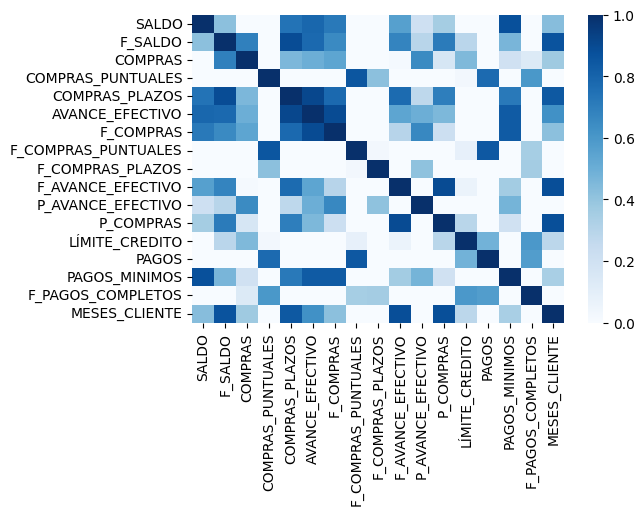

In [18]:
var = ["SALDO", "F_SALDO", "COMPRAS", "COMPRAS_PUNTUALES", "COMPRAS_PLAZOS","AVANCE_EFECTIVO", "F_COMPRAS", "F_COMPRAS_PUNTUALES", "F_COMPRAS_PLAZOS","F_AVANCE_EFECTIVO","P_AVANCE_EFECTIVO","P_COMPRAS","LÍMITE_CREDITO","PAGOS","PAGOS_MINIMOS","F_PAGOS_COMPLETOS","MESES_CLIENTE" ]

plt.figure(figsize=(6, 4))
sns.heatmap(customer_df[var].corr(), cmap="Blues", vmin=0, vmax=1)

Del grafico podemos observar como COMPRAS_PLAZOS, AVANCE_EFECTIVO, F_COMPRAS Están altamente correlacionadas por ende podria ser elegida una sola de las 3 variables. 


In [19]:
var = ["SALDO", "F_SALDO", "COMPRAS", "COMPRAS_PUNTUALES", "AVANCE_EFECTIVO","F_COMPRAS_PUNTUALES", "F_COMPRAS_PLAZOS","F_AVANCE_EFECTIVO","P_AVANCE_EFECTIVO","P_COMPRAS","LÍMITE_CREDITO","PAGOS","PAGOS_MINIMOS","F_PAGOS_COMPLETOS","MESES_CLIENTE" ]

customer_df.drop(columns=[column for column in customer_df.columns if column not in var])


customer_df.sample(5)


,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
2352,C12353,13155.857600,0.777571,41016.496040,6834.278470,17775.510830,38249.52708,0.757230,0.151976,0.556324,0.747103,81,175,15128.985750,8550.430296,64408.59316,0.343844,10
2194,C12195,12494.032380,0.868859,41401.194450,5129.800356,19342.779700,35404.78812,0.758919,0.247820,0.565422,0.660036,86,219,14159.510140,8271.064826,59068.51275,0.339166,10
6097,C16098,14490.233290,0.145143,3101.547774,30232.144560,10803.955200,22330.76574,0.437025,0.649553,0.633477,0.703877,56,191,2398.027312,19162.204820,53272.94028,0.140815,7
7529,C17530,17288.680980,0.096204,6374.338243,26014.762360,10965.656570,21096.00167,0.487168,0.717838,0.640776,0.677990,41,163,3974.119744,13777.007070,63521.59728,0.125588,8
3329,C13330,2952.099883,0.218697,30014.415260,34772.500900,4100.015045,13233.21594,0.469500,0.625087,0.828778,0.159720,89,76,16431.919570,23930.919640,39597.83640,0.916403,6


Verificamos nuevamente la correlación 

<Axes: >

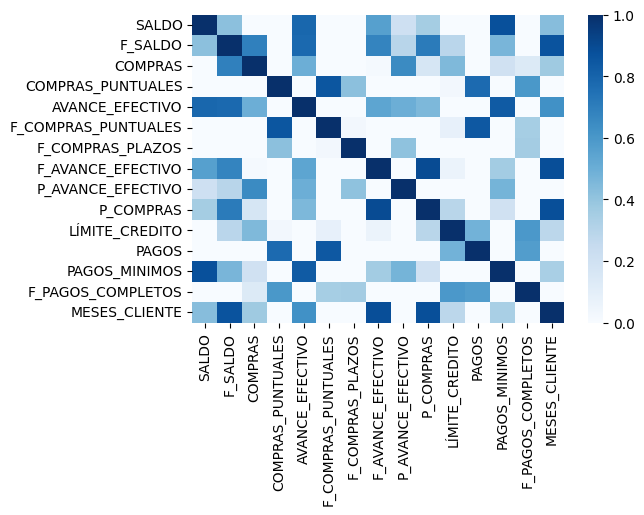

In [20]:
plt.figure(figsize=(6, 4))
sns.heatmap(customer_df[var].corr(), cmap="Blues", vmin=0, vmax=1)

Ya no se encuentra una correlación fuerte entre más de dos variables. Por ende ya se dejan las que están